In [1]:
#!pip install missingno

In [2]:
#!pip install os

In [3]:
#!pip install xgboost

In [4]:
#!pip install imblearn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
df = pd.read_csv("C:/Users/Sharmeen/OneDrive/Desktop/sharmeen/loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print(df.shape)

(614, 13)


In [9]:
#DATA EXPLORATION
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [10]:
#614 unique ids in dataset
#now let's explore gender column
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

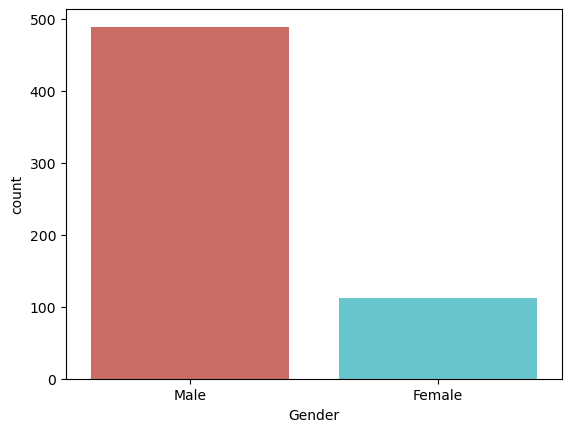

In [11]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [12]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [13]:
#it can be seen males are more in number than females and also there are some missing values
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [14]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [15]:
#now coming to graduate column
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [17]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [18]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [19]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [20]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


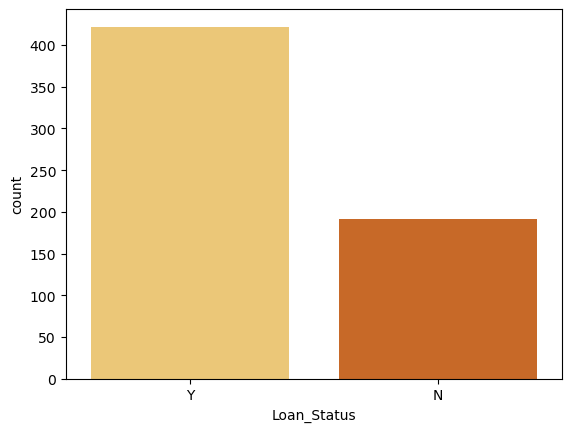

In [22]:
#it can be seen there are no missing values and also the distribution is equal across
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [23]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [24]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


In [26]:
#it can be seen that 360 days loan duration being the most popular among others
#DESCRIBING NUMERICAL VARIABLES
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


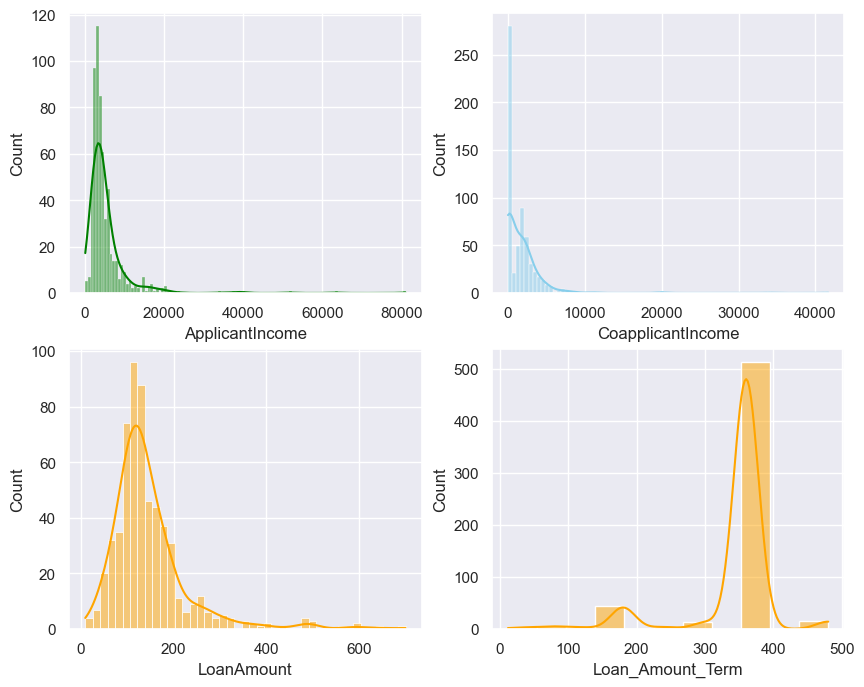

In [27]:
#distribution of the same using histogram and violin plot
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='orange');

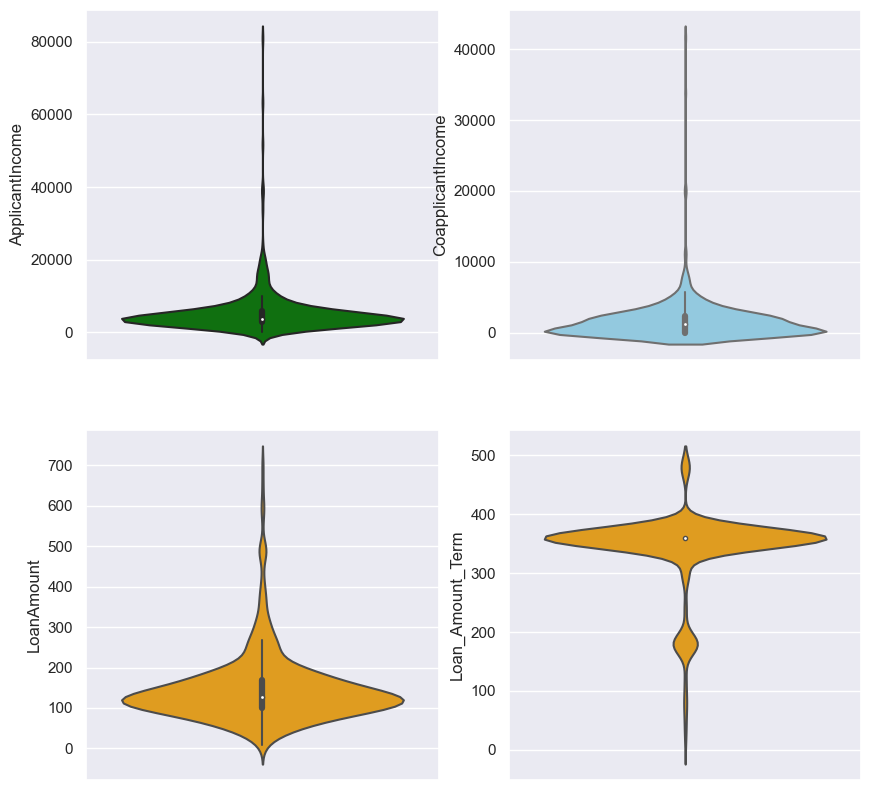

In [28]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange')
sns.violinplot(data=df, y="Loan_Amount_Term", ax=axs1[1, 1], color='orange');

C:\Users\Sharmeen\AppData\Local\Temp\ipykernel_16192\2866730377.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno');


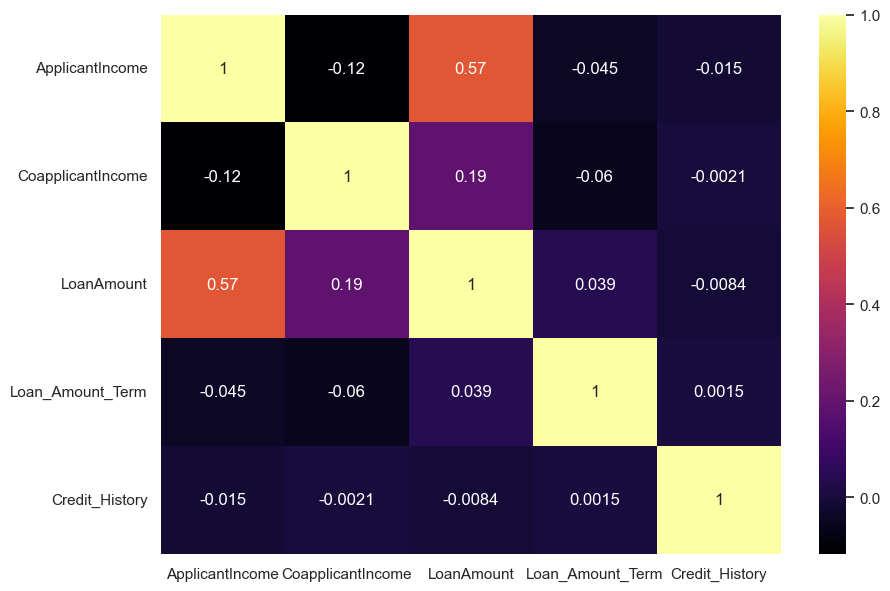

In [29]:
#distribution of applicant income, co-applicant income and loan_amount are all positively skewed and also has some outliers(seen from hist and violin plot)
#now we will go to other exploration methods
#we will do bi-variate analysis(categorical w/ categorical, categorical w/ numerical numerical w/ numerical)
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

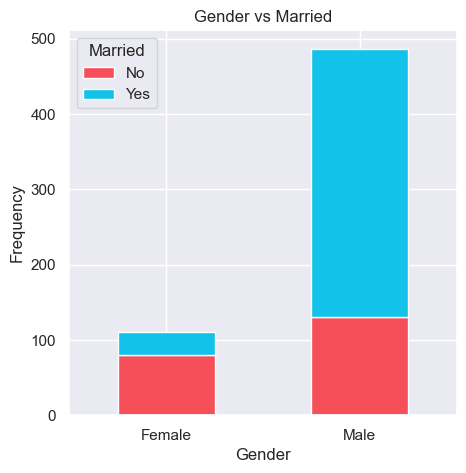

In [30]:
#CATEGORICAL VS CATEGORICAL
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

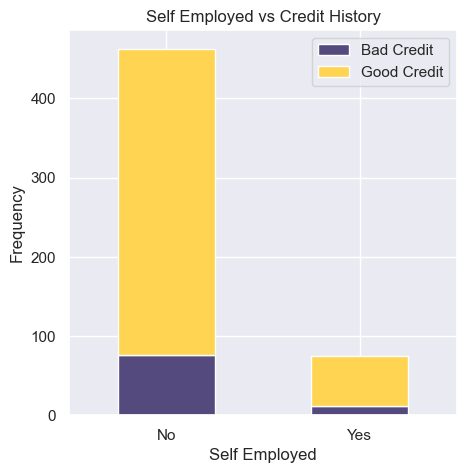

In [31]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

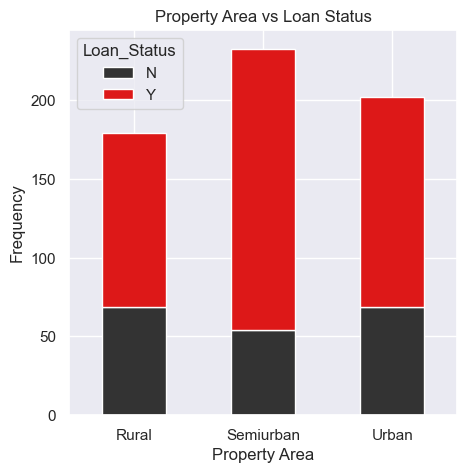

In [32]:

pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

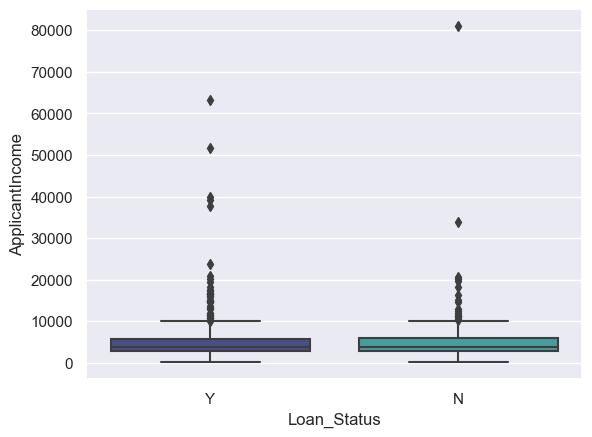

In [33]:
#CATEGORICAL VS NUMERICAL
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

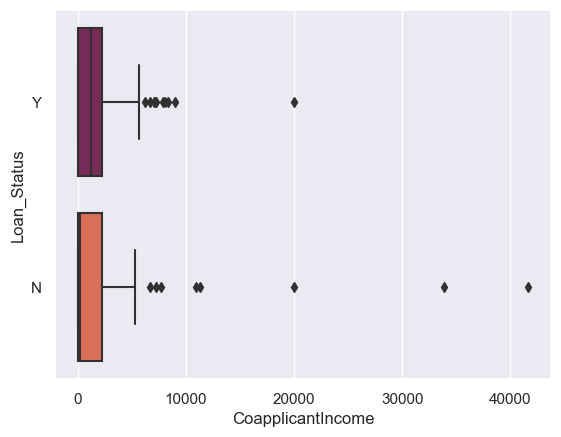

In [34]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

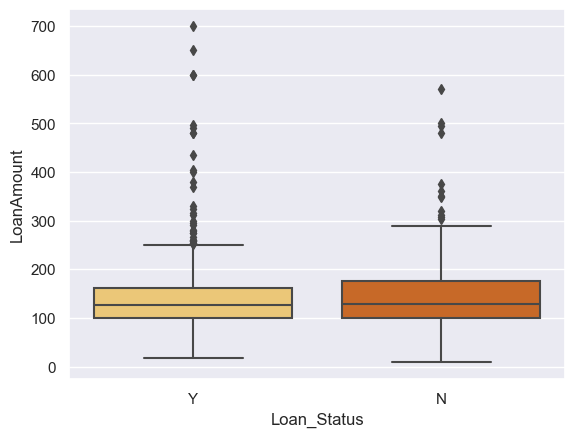

In [35]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

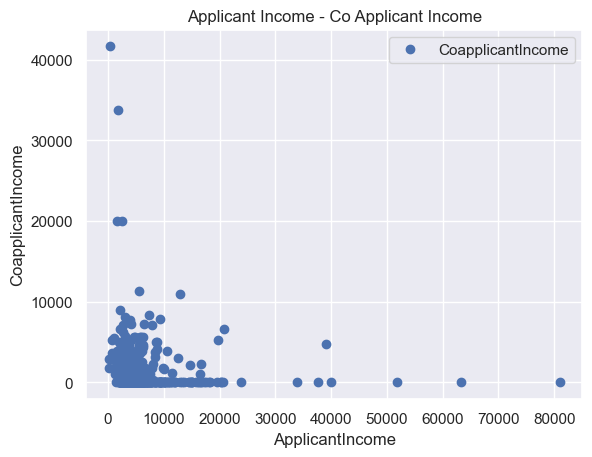

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [36]:
#NUMERICAL VS NUMERICAL
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

In [37]:
#there is negative correlation between applicant and co-applicant income
#and also the confidence interval is 95% since the p-value is 1.46

In [38]:
#NULL VALUE TREATMENT
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

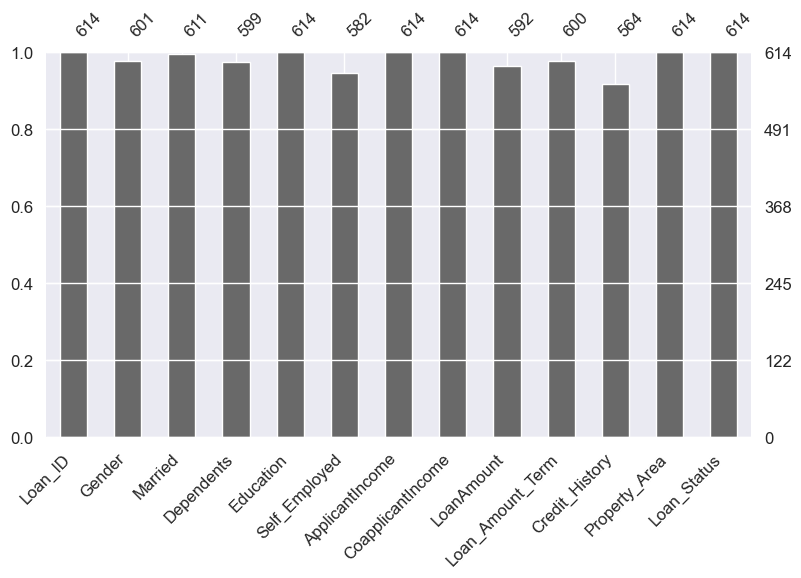

In [39]:
plt.figure(figsize = (20, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

In [40]:
#Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored for all variables in the dataset.

In [41]:
df = df.drop(['Loan_ID'], axis = 1)

In [42]:
#IMPUTATION
#In this section we will impute null and NaN values in categorical columns using MODE
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [43]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
#NULL VALUES IN NUMERICAL COLUMN OF LOAN AMOUNT HAS BEEN TREATED WITH MEAN
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [45]:
#ONE-HOT ENCODING 
#DONE FOR TRANSFORMING CATEGORICAL VARIABLES TO A WAY IN WHICH ML ALGORITHMS CAN UNDERSTAND AND PREDICT BETTER
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [46]:
#REMOVAL OF OUTLIERS AND INFINITE VALUES
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

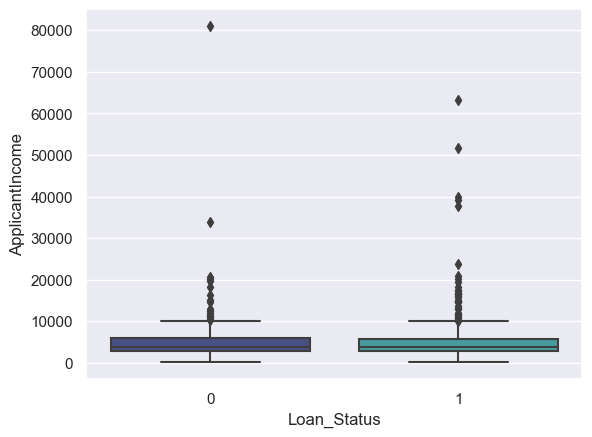

In [47]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

In [48]:
#SKEWED DISTRIBUTION TREATMENT
# Square Root Transformation for normalizing distribution

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

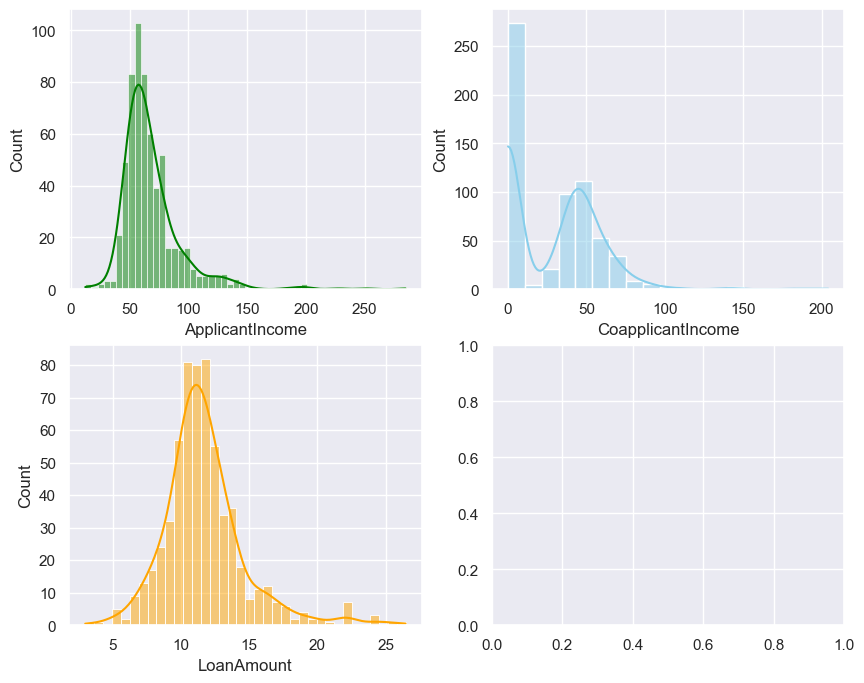

In [49]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [50]:
#the distribution after using log transformation are much better compared to original distribution.

In [51]:
#Features Separating
#Dependent features (Loan_Status) will be seperated from independent features.
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [52]:
#SMOTE Technique
#In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [53]:
X, y = SMOTE().fit_resample(X, y)

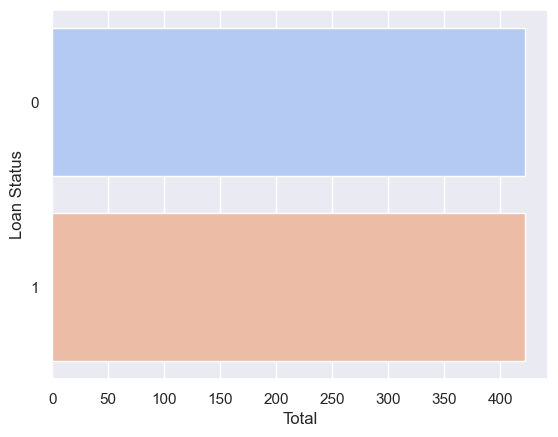

In [54]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [55]:
#distribution is now balanced

In [56]:
#DATA NORMALIZATION
#Min-Max scaler used for normalizing range of independent variables or features
#X = MinMaxScaler().fit_transform(X)

In [57]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
X

array([[ 0.28049688, -0.92320975,  0.10796156, ..., -0.57187763,
        -0.65243825,  1.63877684],
       [-0.04643366,  0.39510195, -0.15969074, ...,  1.74862583,
        -0.65243825, -0.61021121],
       [-0.52767995, -0.92320975, -1.24532566, ..., -0.57187763,
        -0.65243825,  1.63877684],
       ...,
       [ 0.73679369,  1.44940263,  2.30606919, ..., -0.57187763,
        -0.65243825, -0.61021121],
       [-0.9923728 ,  5.03905646, -0.38375461, ..., -0.57187763,
        -0.65243825,  1.63877684],
       [-0.42837837,  0.66452575, -0.1502778 , ..., -0.57187763,
        -0.65243825, -0.61021121]])

In [60]:
y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: uint8

In [61]:
y_train

468    1
786    0
538    0
266    1
352    1
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 675, dtype: uint8

In [62]:
y_test

493    1
215    1
622    0
737    0
63     0
      ..
351    0
445    1
750    0
198    1
779    0
Name: Loan_Status, Length: 169, dtype: uint8

In [63]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
np.shape(X)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
#!pip install --upgrade scikit-learn

In [65]:
#NOW WE WILL COME TO THE MAIN MODELLING PART
#STARTING WITH LOGISTIC REGRESSION
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1,penalty='l2', C=1.0)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        94
           1       0.76      0.97      0.85        75

    accuracy                           0.85       169
   macro avg       0.87      0.86      0.85       169
weighted avg       0.88      0.85      0.85       169

[[71 23]
 [ 2 73]]
LR accuracy: 85.21%


In [ ]:
y_pred

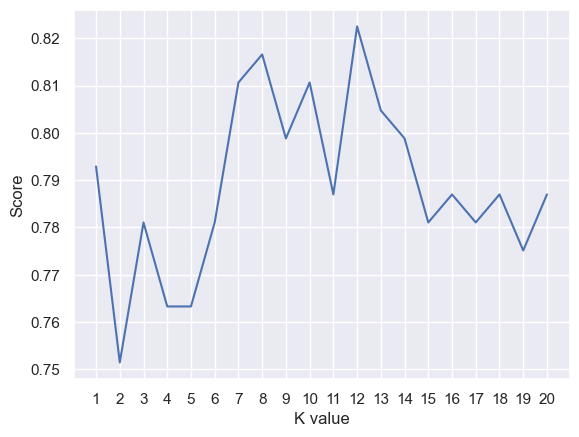

KNN best accuracy: 82.25%


In [66]:
#KNN
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [67]:
y_pred = KNclassifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for KNN:\n", report)
print(confusion_matrix(y_test,y_pred))
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78        94
           1       0.69      0.95      0.80        75

    accuracy                           0.79       169
   macro avg       0.81      0.80      0.79       169
weighted avg       0.83      0.79      0.79       169

[[62 32]
 [ 4 71]]
KNN best accuracy: 82.25%


In [68]:
#SVM
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84        94
           1       0.75      0.97      0.85        75

    accuracy                           0.85       169
   macro avg       0.86      0.86      0.85       169
weighted avg       0.87      0.85      0.85       169

[[70 24]
 [ 2 73]]
SVC accuracy: 84.62%


C:\Users\Sharmeen\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
import numpy as np

# Check the unique values (classes) in y_test
unique_classes = np.unique(y_test)
print("Unique Classes in y_test:", unique_classes)

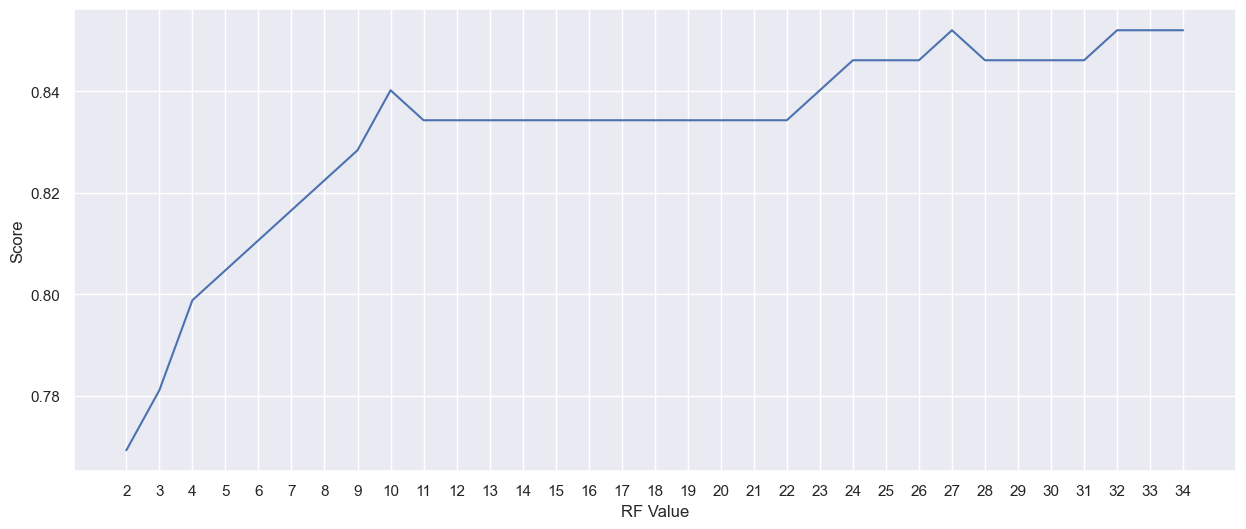

Random Forest Accuracy:  85.21%


In [69]:
#RANDOM FOREST
scoreListRF = []
for i in range(2,35):
    RFclassifier = RandomForestClassifier(n_estimators = 1900, max_depth=10, random_state = 49, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.figure(figsize=(15, 6))   

plt.plot(range(2,35), scoreListRF)
plt.xticks(np.arange(2,35,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [70]:
y_pred = RFclassifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Random Forest:\n", report)
print(confusion_matrix(y_test,y_pred))
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85        94
           1       0.77      0.96      0.85        75

    accuracy                           0.85       169
   macro avg       0.86      0.86      0.85       169
weighted avg       0.87      0.85      0.85       169

[[72 22]
 [ 3 72]]
Random Forest Accuracy:  85.21%


In [71]:
#MODEL COMPARISON FINAL CHART
compare = pd.DataFrame({'Model': ['Random Forest', 'K Neighbors', 
                                  'SVM','Logistic Regression'], 
                        'Accuracy': [RFAcc*100, KNAcc*100, SVCAcc*100, 
                                     LRAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Random Forest,85.207101
3,Logistic Regression,85.207101
2,SVM,84.615385
1,K Neighbors,82.248521


In [ ]:
#In general, it can be seen that all models can achieve up to 70% accuracy.
#The highest accuracy is 84% by logistic regression.

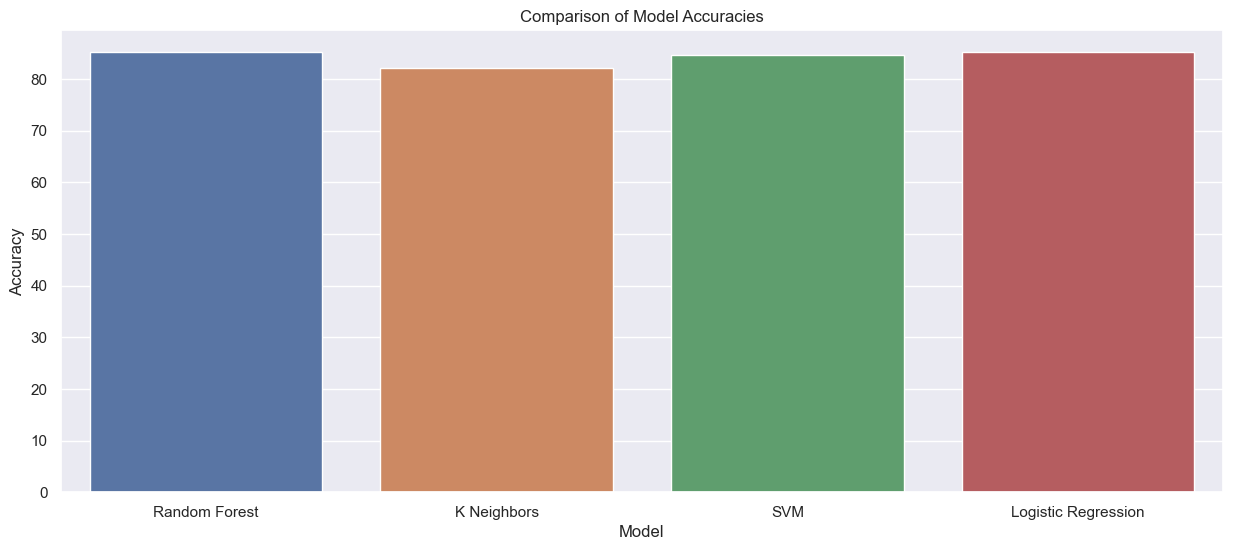

In [72]:
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Create the bar plot
sns.barplot(x=compare['Model'], y=compare['Accuracy'])

# Add labels and titles 
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

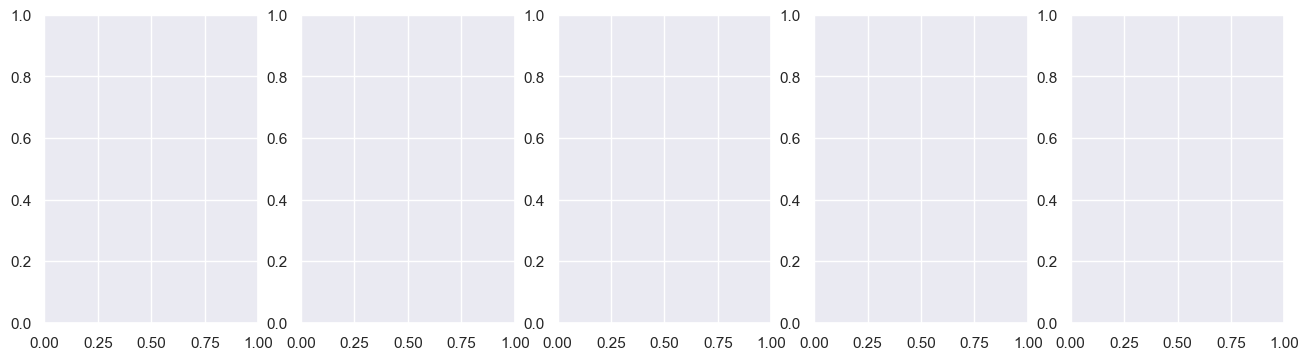

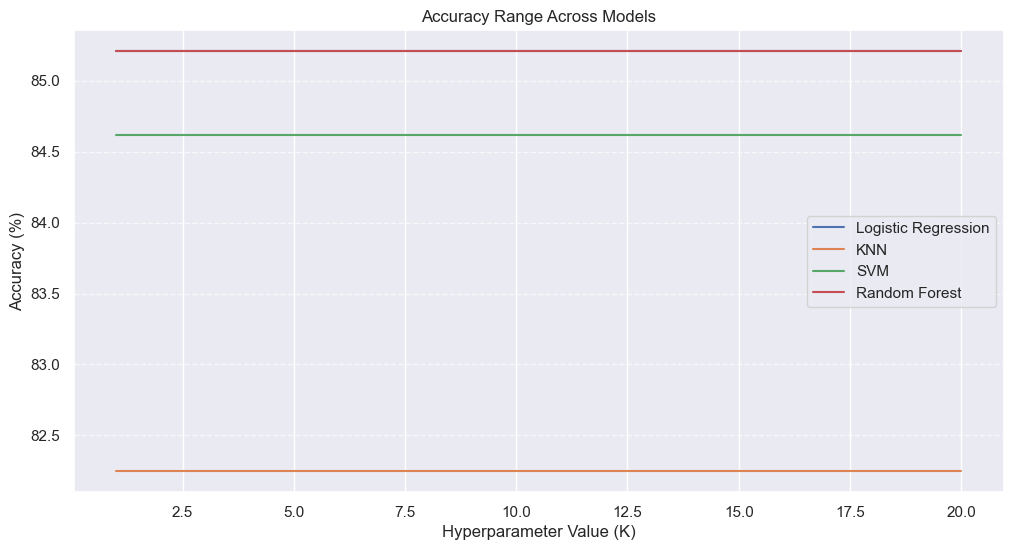

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))  # Adjust figsize as needed

# Plot the performance of each model
models = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']
scores = [LRAcc * 100, KNAcc * 100, SVCAcc * 100, RFAcc * 100]

plt.figure(figsize=(12, 6))

for model, score in zip(models, scores):
    plt.plot(range(1, 21), [score] * 20, label=model)

# Set labels and title
plt.xlabel('Hyperparameter Value (K)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Range Across Models')

# Set legend
plt.legend()

# Show the plots
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()